<a href="https://colab.research.google.com/github/sudeep-hk/DeepLearning/blob/main/Geneder_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#import libraries
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense,InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!unzip /content/drive/My\ Drive/DL\ projects/train_gender.zip

Archive:  /content/drive/My Drive/DL projects/train_gender.zip
replace images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [29]:
#read csv file
data=pd.read_csv('train.csv')

In [30]:
#fix random generator
seed=42
rng=np.random.RandomState(seed)

In [31]:
#eyeballing first dataset
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [32]:
#check the distribution of class data
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [33]:
#load image and store it into numpy array
X=[]
#iterating over all image
for image_name in data.image_names[:2000]:
  #load image file
  img=plt.imread('images/'+image_name)
  X.append(img)
#converting list into array
X=np.array(X)
#storing target variable in y 
y=data['class'][:2000]

In [34]:
#shape of the image
X.shape

(2000, 224, 224, 3)

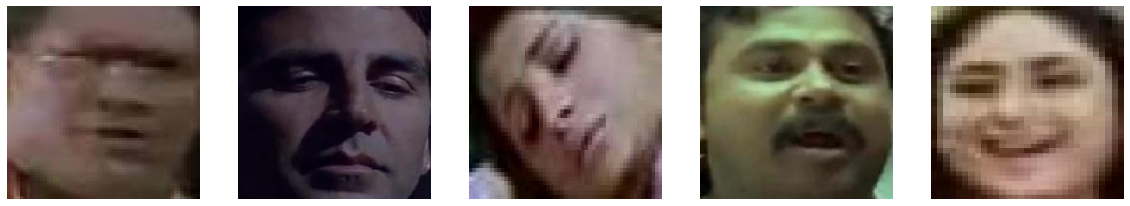

In [35]:
#visualising image
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*123])
  ax[i].axis('off')

In [36]:
##preprocess the data for feeding into the model
#converting 3D into 1D ... model can use 1D data
X=X.reshape(X.shape[0],224*224*3)
X.shape

(2000, 150528)

In [37]:
#value is b/w the range
X.min(),X.max()

(0, 255)

In [38]:
#normalising the value to train the model fast(reduce the computation error)
X=X/X.max()

In [39]:
#min and max after normalisation
X.min()

0.0

In [40]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [41]:
X_train.shape

(1400, 150528)

In [42]:
#define model architecture
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [44]:
##compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [45]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
11/11 [==============================] - 2s 138ms/step - loss: 1.2354 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5150
Epoch 2/50
11/11 [==============================] - 1s 59ms/step - loss: 0.6923 - accuracy: 0.5351 - val_loss: 0.6918 - val_accuracy: 0.5083
Epoch 3/50
11/11 [==============================] - 1s 61ms/step - loss: 0.6881 - accuracy: 0.5539 - val_loss: 0.6849 - val_accuracy: 0.5483
Epoch 4/50
11/11 [==============================] - 1s 61ms/step - loss: 0.6822 - accuracy: 0.5922 - val_loss: 0.6757 - val_accuracy: 0.6700
Epoch 5/50
11/11 [==============================] - 1s 60ms/step - loss: 0.6818 - accuracy: 0.6283 - val_loss: 0.6642 - val_accuracy: 0.6483
Epoch 6/50
11/11 [==============================] - 1s 59ms/step - loss: 0.6615 - accuracy: 0.6166 - val_loss: 0.6817 - val_accuracy: 0.5100
Epoch 7/50
11/11 [==============================] - 1s 59ms/step - loss: 0.6758 - accuracy: 0.5551 - val_loss: 0.6417 - val_accuracy: 0.6533
Epoch 8/50
1

In [46]:
# getting predictions in the form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.7433333333333333 %


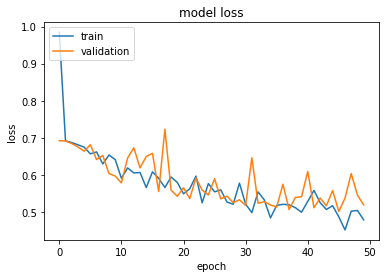

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 98 % sure that it is male


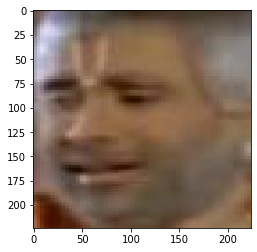

In [58]:
# pull out the original images from the data which correspond to the validation data
_, male, _, valid_y = train_test_split(data.image_names[:2000].values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(male)))

# get the corresponding image name and probability
img_name = male[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/'+ img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is male')
#print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

In [60]:
test=pd.read_csv('test.csv')

In [66]:
test.shape

(5227, 1)

In [63]:
predictions = model.predict_classes(test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored